## 4.Linear Regression

TODO: ใช้ Linear Regression เพื่อทำนายข้อมูลราคาบ้าน Boston_house.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.impute import SimpleImputer

In [5]:
# downlad dataset boston_house.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15g16On6T568voElEb0uSlJozphTdi1Du' -O boston_house.csv

--2023-09-10 08:26:50--  https://docs.google.com/uc?export=download&id=15g16On6T568voElEb0uSlJozphTdi1Du
Resolving docs.google.com (docs.google.com)... 108.177.11.100, 108.177.11.138, 108.177.11.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsgvo9eotjj27gpqc5qib472b9hupq0c/1694334375000/05830297694632628921/*/15g16On6T568voElEb0uSlJozphTdi1Du?e=download&uuid=cc11e9a7-40b9-42ad-8619-e351c32b07e1 [following]
--2023-09-10 08:26:51--  https://doc-14-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsgvo9eotjj27gpqc5qib472b9hupq0c/1694334375000/05830297694632628921/*/15g16On6T568voElEb0uSlJozphTdi1Du?e=download&uuid=cc11e9a7-40b9-42ad-8619-e351c32b07e1
Resolving doc-14-28-docs.googleusercontent.com (doc-14-28-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0

In [6]:
# TO_DO: read csv and create dataframe
boston_df = pd.read_csv('boston_house.csv', sep=';')
print(boston_df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX       B  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  396.90   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242  396.90   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242  392.83   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222  394.63   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222  396.90   

   PRICE  
0   24.0  
1   21.6  
2   34.7  
3   33.4  
4   36.2  


In [7]:
# TO_DO: Show sample data in the DataFrame
print("Sample Data:")
print(boston_df.head())

Sample Data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX       B  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  396.90   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242  396.90   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242  392.83   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222  394.63   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222  396.90   

   PRICE  
0   24.0  
1   21.6  
2   34.7  
3   33.4  
4   36.2  


In [8]:
# TO_DO: Show DataFrame information
print("DataFrame Information:")
print(boston_df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  B       506 non-null    float64
 11  PRICE   452 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB
None


In [9]:
# Impute missing values in the "PRICE" column with the mean
imputer = SimpleImputer(strategy="mean")
boston_df["PRICE"] = imputer.fit_transform(boston_df[["PRICE"]])

In [10]:
# TO_DO: Split data into X (features) and y (target)
X = boston_df.drop(columns=["PRICE"])  # Features
y = boston_df["PRICE"]  # Target variable

In [11]:
# TO_DO: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# TO_DO: Train the data with Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

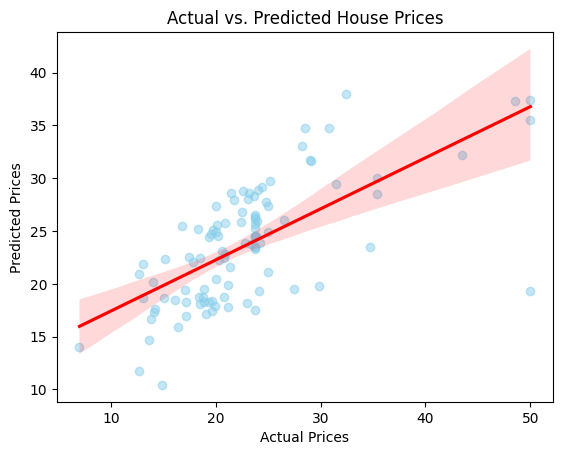

In [13]:
# Create a scatter plot of actual vs. predicted values with the regression line
sns.regplot(x=y_test, y=regr.predict(X_test), color='skyblue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [14]:
# Predict House Price for an example with features
example_features = [[0.03359, 75, 2.95, 0, 0.428, 7.024, 15.8, 5.4011, 3, 252, 395.62]]
predicted_price = regr.predict(example_features)
print("\nPredicted Price:", predicted_price[0])


Predicted Price: 35.22967674347581


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TO_DO: ราคาบ้านที่โมเดลทำนายได้ = $35.23k

In [15]:
# Evaluate the model
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 33.03138423342602
R-squared: 0.4420640875380286
